In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, shutil
import cv2
import random
import pandas as pd
import numpy as np
import joblib

from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm
from imutils import paths

In [ ]:
# get all the directory paths
dir_paths = os.listdir('/content/drive/MyDrive/train')
dir_paths.sort()
root_path = '/content/drive/MyDrive/train'

In [ ]:
# get --num-images images from each category
for idx, dir_path  in tqdm(enumerate(dir_paths), total=len(dir_paths)):
    all_images = os.listdir(f"{root_path}/{dir_path}")
    os.makedirs(f"/content/drive/MyDrive/train_image/{dir_path}", exist_ok=True)
    for i in range(27): # how many images to preprocess for each category
        # generate a random id between 0 and 2999
        rand_id = (random.randint(0, 26))
        image = cv2.imread(f"{root_path}/{dir_path}/{all_images[rand_id]}")
        image = cv2.resize(image, (299,299))
        cv2.imwrite(f"/content/drive/MyDrive/train_image/{dir_path}/{dir_path}{i}.jpg", image)
print('DONE')

100%|██████████| 37/37 [02:19<00:00,  3.78s/it]

DONE


In [ ]:
image_paths = list(paths.list_images('/content/drive/MyDrive/train_image/'))
train_Img_Path = '/content/drive/MyDrive/train_image/'

In [ ]:
data = pd.DataFrame()
labels = []
for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
    label = image_path.split(os.path.sep)[-2]
    # # save the relative path for mapping image to target
    data.loc[i, 'image_path'] = image_path
    labels.append(label)

100%|██████████| 999/999 [00:00<00:00, 3362.35it/s]


In [ ]:
labels[38]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
labels

['Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Ain ع',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Aliph ا',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 'Bari yeh ے',
 

In [ ]:
labels = np.array(labels)
# one hot encode the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
labels[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
len(labels)

999

In [ ]:
print(f"The first one hot encoded labels: {labels[27]}")
print(f"Mapping the first one hot encoded label to its category: {lb.classes_[27]}")
print(f"Total instances: {len(labels)}")

The first one hot encoded labels: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Mapping the first one hot encoded label to its category: Suaad ص
Total instances: 999


In [ ]:
for i in range(len(labels)):
    index = np.argmax(labels[i])
    data.loc[i, 'target'] = int(index)

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data.head(5)

,image_path,target
0,/content/drive/MyDrive/train_image/Hamza ‍‌ء/H...,11
1,/content/drive/MyDrive/train_image/Ray ر/Ray ر...,18
2,/content/drive/MyDrive/train_image/Meem م/Meem...,36
3,/content/drive/MyDrive/train_image/Djay ژ/Djay...,22
4,/content/drive/MyDrive/train_image/Daal د/Daa...,34


In [ ]:
# save as CSV file
data.to_csv('/content/drive/MyDrive/data.csv', index=False)
# pickle the binarized labels
print('Saving the binarized labels as pickled file')
joblib.dump(lb, '/content/drive/MyDrive/lb.pkl')
print(data.head(5))

Saving the binarized labels as pickled file
                                          image_path  target
0  /content/drive/MyDrive/train_image/Hamza ‍‌ء/H...      11
1  /content/drive/MyDrive/train_image/Ray ر/Ray ر...      18
2  /content/drive/MyDrive/train_image/Meem م/Meem...      36
3  /content/drive/MyDrive/train_image/Djay ژ/Djay...      22
4  /content/drive/MyDrive/train_image/Daal  د/Daa...      34


In [ ]:
#import for Model Creation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
import cv2
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the data.csv file and get the image paths and labels
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df['target'] = df['target'].astype(str)
X = df.image_path.values
Y = df.target.values

In [ ]:
df

,image_path,target
0,/content/drive/MyDrive/train_image/Pay پ/Pay پ...,22.0
1,/content/drive/MyDrive/train_image/Noon ن/Noon...,21.0
2,/content/drive/MyDrive/train_image/Meem م/Meem...,20.0
3,/content/drive/MyDrive/train_image/Sheen ‎‎ش/S...,26.0
4,/content/drive/MyDrive/train_image/Zay ز/Zay ز...,33.0
...,...,...
994,/content/drive/MyDrive/train_image/Daal د/Daa...,6.0
995,/content/drive/MyDrive/train_image/Daal ڈ/Daal...,7.0
996,/content/drive/MyDrive/train_image/Meem م/Meem...,20.0
997,/content/drive/MyDrive/train_image/Meem م/Meem...,20.0


In [ ]:
gen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=10,  # Rotate images randomly by 10 degrees
    zoom_range=0.2,  # Zoom images by up to 20%
    width_shift_range=0.1,  # Shift images horizontally by 10%
    height_shift_range=0.1,  # Shift images vertically by 10%
    horizontal_flip = True,
    validation_split=0.3 # training: 80% data, validation: 30% data
                 )

In [ ]:
train_generator = gen.flow_from_dataframe(
    df, # dataframe
    directory = train_Img_Path, # images data path / folder in which images are there
    x_col = 'image_path',
    y_col = 'target',
    subset="training",
    color_mode="rgb",
    target_size = (299,299), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
)
validation_generator = gen.flow_from_dataframe(
    df, # dataframe
    directory = train_Img_Path, # images data path / folder in which images are there
    x_col = 'image_path',
    y_col = 'target',
    subset="validation",
    color_mode="rgb",
    target_size = (299,299), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
)

Found 700 validated image filenames belonging to 37 classes.
Found 299 validated image filenames belonging to 37 classes.


In [ ]:
x,y = next(train_generator)
x.shape

(32, 299, 299, 3)

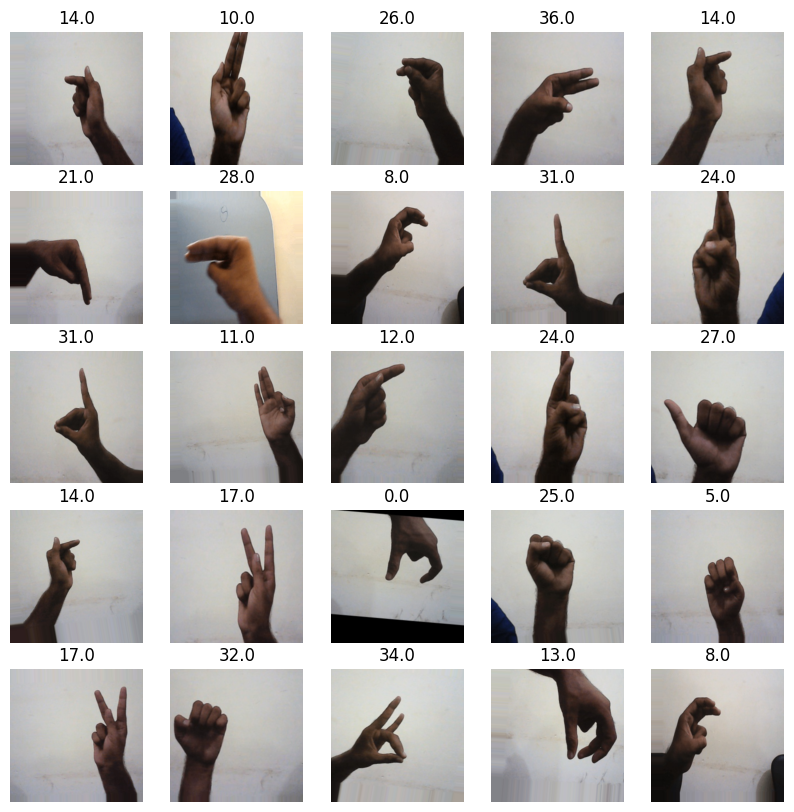

In [ ]:
a = validation_generator.class_indices
class_names = list(a.keys())  # storing class names

def plot_images(img, labels):
    plt.figure(figsize=[10, 10])
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

plot_images(x,y)


In [ ]:
# load the Xception architecture with imagenet weights as base
base_model = tf.keras.applications.Xception(
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        input_shape=(299,299,3),
        pooling=None,
        classes=37,
        classifier_activation="softmax",
)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable=False

In [ ]:
model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(37, activation='softmax')
    ])

**BatchNormalization :**

### It is a normalization technique which is done along mini-batches instead of the full data set.
### It is used to speed up training and use higher learning rates.
It maintains the mean output close to 0 and the output standard deviation close to 1.

**GlobalAveragePooling2D :**

It takes a tensor of size (input width) x (input height) x (input channels) and computes the average value of all values across the entire (input width) x (input height) matrix for each of the (input channels).
The dimensionality of the images is reduced by reducing the number of pixels in the output from the previous neural network layer.
By using this we get a 1-dimensional tensor of size (input channels) as our output.
2D Global average pooling operation. Here ‘Depth’ = ‘Filters’
Dense Layers: These layers are regular fully connected neural network layers connected after the convolutional layers.

Drop out layer: is also used whose function is to randomly drop some neurons from the input unit so as to prevent overfitting. The value of 0.5 indicates that 0.5 fractions of neurons have to be dropped.

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 batch_normalization_4 (Batc  (None, 10, 10, 2048)     14336     
 hNormalization)                                                 
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0

**Defining callbacks to preserve the best results:**

Callback: It is an object that can perform actions at various stages of training (for example, at the start or end of an epoch, before or after a single batch, etc).

In [ ]:
#stopping early by using callback
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [ ]:
#fit model
batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# # fit model
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks=[early])

Epoch 1/10
21/21 [==============================] - 47s 2s/step - loss: 3.3704 - accuracy: 0.1108 - val_loss: 2.8007 - val_accuracy: 0.3229
Epoch 2/10
21/21 [==============================] - 26s 1s/step - loss: 2.3817 - accuracy: 0.3683 - val_loss: 1.6057 - val_accuracy: 0.6285
Epoch 3/10
21/21 [==============================] - 27s 1s/step - loss: 1.3760 - accuracy: 0.6168 - val_loss: 0.8549 - val_accuracy: 0.7882
Epoch 4/10
21/21 [==============================] - 26s 1s/step - loss: 0.8208 - accuracy: 0.7590 - val_loss: 0.4952 - val_accuracy: 0.8924
Epoch 5/10
21/21 [==============================] - 30s 1s/step - loss: 0.4642 - accuracy: 0.8623 - val_loss: 0.3602 - val_accuracy: 0.9028
Epoch 6/10
21/21 [==============================] - 32s 1s/step - loss: 0.3571 - accuracy: 0.8847 - val_loss: 0.1651 - val_accuracy: 0.9757
Epoch 7/10
21/21 [==============================] - 28s 1s/step - loss: 0.2459 - accuracy: 0.9371 - val_loss: 0.1767 - val_accuracy: 0.9549
Epoch 8/10
21/21 [==

In [ ]:
model.save("/content/drive/MyDrive/PakistanSignLanguageDetection.h5")

In [ ]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy:0.9747023582458496\nValidation Accuracy: 0.9756944179534912')

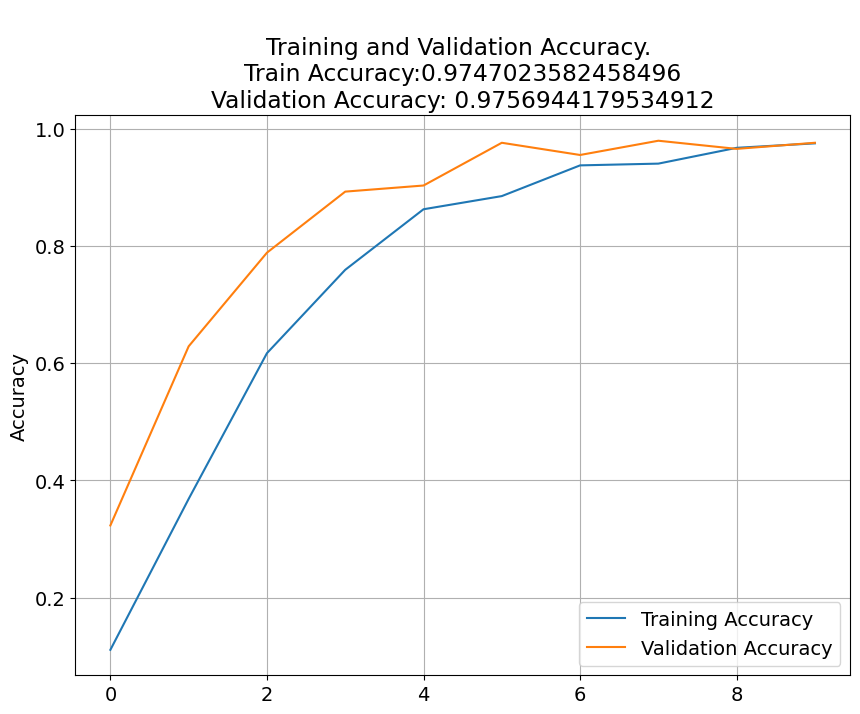

In [ ]:
# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

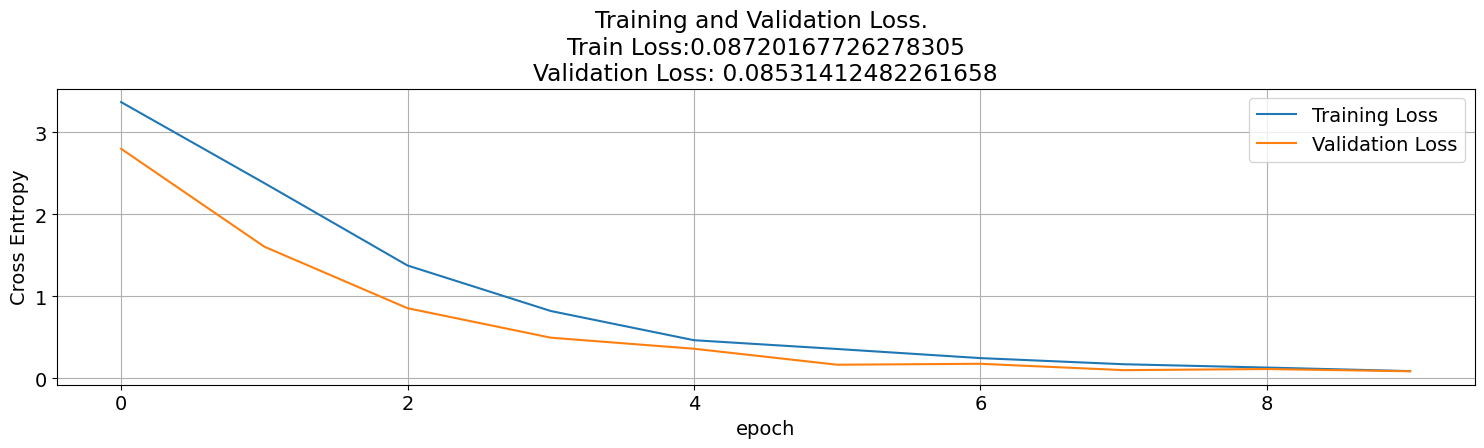

In [ ]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:{str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])

10/10 [==============================] - 10s 957ms/step - loss: 0.0950 - accuracy: 0.9699
[0.09503090381622314, 0.9698996543884277]
Accuracy: 96.9900%
Loss:  0.09503090381622314


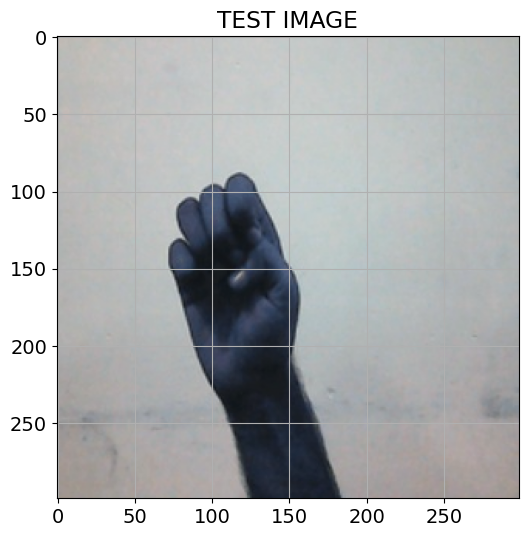

In [ ]:

test_img_path = "/content/drive/MyDrive/train_image/Chhoti yeh ی/Chhoti yeh ی0.jpg"

img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (299, 299)).reshape(-1, 299, 299, 3)/255

plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])

In [ ]:
#Test the Results
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/train_image/Daal  د/Daal  د13.jpg')
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (299, 299))
img = tf.reshape(img, (-1, 299, 299, 3))
prediction = model.predict(img/255)
prediction = np.argmax(prediction)
prediction

1/1 [==============================] - 0s 49ms/step


33